In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

In [3]:
from Scripts import simulation_CLI as cleo

In [4]:
identity = DM.Identity(DM.energy_basis(4))

In [5]:
for unitary_seed in range(1):
    initial_pops = [.2, .2, .2, .2, .4, .2, .2, .2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "greedy"
    num_steps = 10
    data = cleo.execute(file_name="greedy",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy


In [6]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [7]:
for unitary_seed in range(1):
    initial_pops = [.2, .2, .2, .2, .4, .2, .2, .2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "random"
    num_steps = 10
    data = cleo.execute(file_name="random",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_random


In [8]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [9]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

In [10]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [11]:
newdata1 = dict(h5py.File("../data/greedy/greedy.hdf5"))

In [12]:
newdata2 =  dict(h5py.File("../data/random/random.hdf5"))

In [13]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [14]:
popsgreedy = get_pops(newdata1,8,"c5","greedy")

In [15]:
twoQdmsgreedy = get_2_qbit_dms(newdata1,8,"c5","greedy")

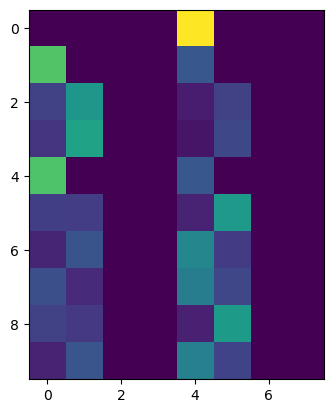

In [16]:
for i in range(1):
    plt.imshow(popsgreedy[i], interpolation='none')
    plt.show()

In [17]:
# saves temperature swatches for each simulation index
for i in range(5):
    plt.imshow(popsgreedy[i], interpolation='none')
    plt.savefig(f'plotnumgreedy_{i}.png')   # save the figure to file
    plt.close() 

In [17]:
popsrandom =  get_pops(newdata2,8,"c5","random")

In [18]:
twoQdmsrandom = get_2_qbit_dms(newdata2,8,"c5","random")

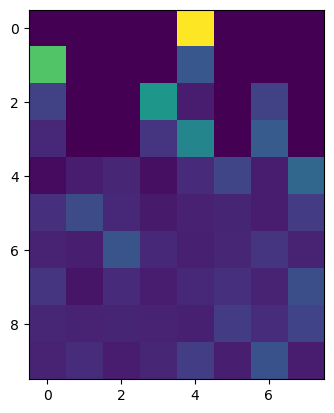

In [19]:
for i in range(1):
    plt.imshow(popsrandom[i], interpolation='none')
    plt.show()

In [21]:
for i in range(5):
    plt.imshow(popsrandom[i], interpolation='none')
    plt.savefig(f'plotnumrandom_{i}.png')   # save the figure to file
    plt.close() 

In [20]:
# generate exractable work and change in extractable work data for greedy
sizes = [8]
connectivities = ["c5"]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in connectivities:
        pops = get_pops(newdata1,size,connectivity,"greedy")
        extractable_work = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work = np.diff(extractable_work,axis = 1)
        hot__percent_greater_0 = np.mean(change_in_ex_work[:,:,(4)]>0,axis = 1).flatten()
        cold_percent_greater_0 = np.mean(change_in_ex_work[:,:,(1,2,3,5,6,7)]>0,axis = 1).flatten()
        result[size]['hot'][connectivity] = hot__percent_greater_0
        result[size]['cold'][connectivity] = cold_percent_greater_0

In [21]:
# generate exractable work and change in extractable work data for random
sizes = [8]
connectivities = ["c5"]
temps = ['cold','hot']
result_random = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in connectivities:
        pops = get_pops(newdata2,size,connectivity,"random")
        extractable_work_random = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work_random = np.diff(extractable_work_random,axis = 1)
        hot__percent_greater_0_random = np.mean(change_in_ex_work_random[:,:,(4)]>0,axis = 1).flatten()
        cold_percent_greater_0_random = np.mean(change_in_ex_work_random[:,:,(1,2,3,5,6,7)]>0,axis = 1).flatten()
        result_random[size]['hot'][connectivity] = hot__percent_greater_0_random
        result_random[size]['cold'][connectivity] = cold_percent_greater_0_random

In [ ]:
# generate exractable work and change in extractable work data for update_rule if data set has more than 1 sized network 
sizes = [8,12]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in data[f'{size} qubits']:
        print(f'{size} qubits {connectivity}')
        pops = get_pops(data,size,connectivity[:-13])
        extractable_work = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work = np.diff(extractable_work,axis = 1)
        hot__percent_greater_0 = np.mean(change_in_ex_work[:,:,(0,4)]>0,axis = 1).flatten()
        cold_percent_greater_0 = np.mean(change_in_ex_work[:,:,(1,2,3,5,6,7)]>0,axis = 1).flatten()
        result[size]['hot'][connectivity] = hot__percent_greater_0
        result[size]['cold'][connectivity] = cold_percent_greater_0

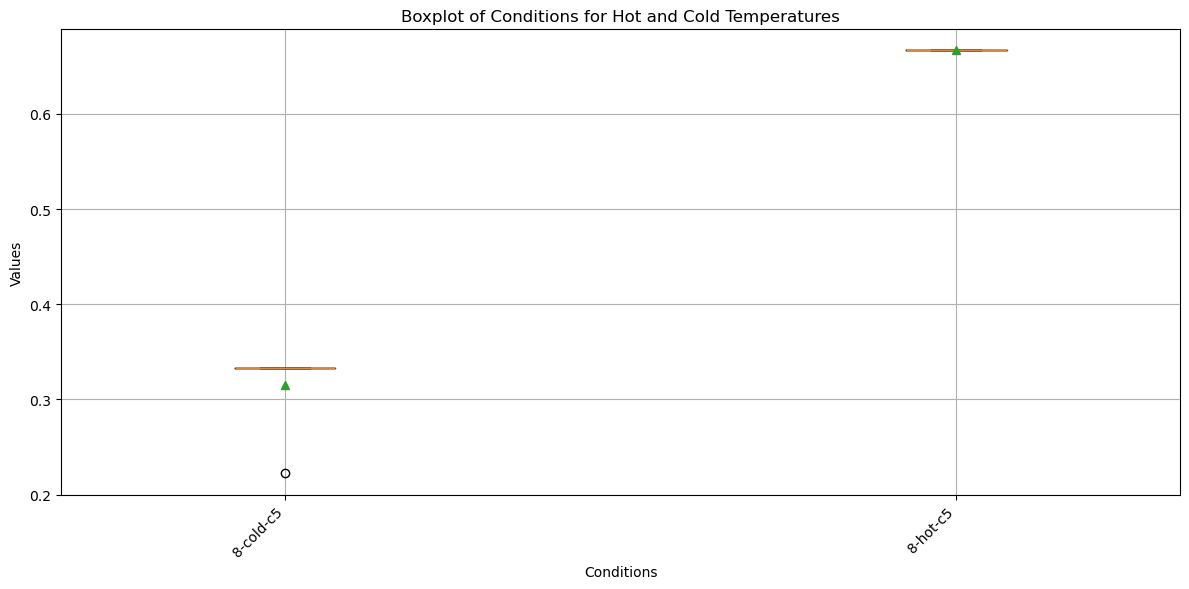

In [22]:
# Extracting data for plotting (greedy)
labels = []
all_data = []
positions = []
num_subgroups = sum(len(inner_dict) for outer_dict in result.values() for inner_dict in outer_dict.values())

i,j,k=0,0,0
for outer_key, outer_value in result.items():
    i+=1
    for inner_key, inner_value in outer_value.items():
        j+=1
        for innermost_key, innermost_value in inner_value.items():
            k+=1
            labels.append(f"{outer_key}-{inner_key}-{innermost_key}")
            all_data.append(innermost_value)
            positions.append(1.2*i+.9*j+.6*k)

# Creating boxplot with custom positions
num_boxes = len(all_data)
num_outer_keys = len(result)
group_gap = 3  # adjust the gap between groups


plt.figure(figsize=(12, 6))
plt.boxplot(all_data, positions=positions, showmeans=True)

plt.xticks(positions, labels, rotation=45, ha='right')
plt.xlabel('Conditions')
plt.ylabel('Values')
plt.title('Boxplot of Conditions for Hot and Cold Temperatures')
plt.grid(True)
plt.tight_layout()
plt.show()

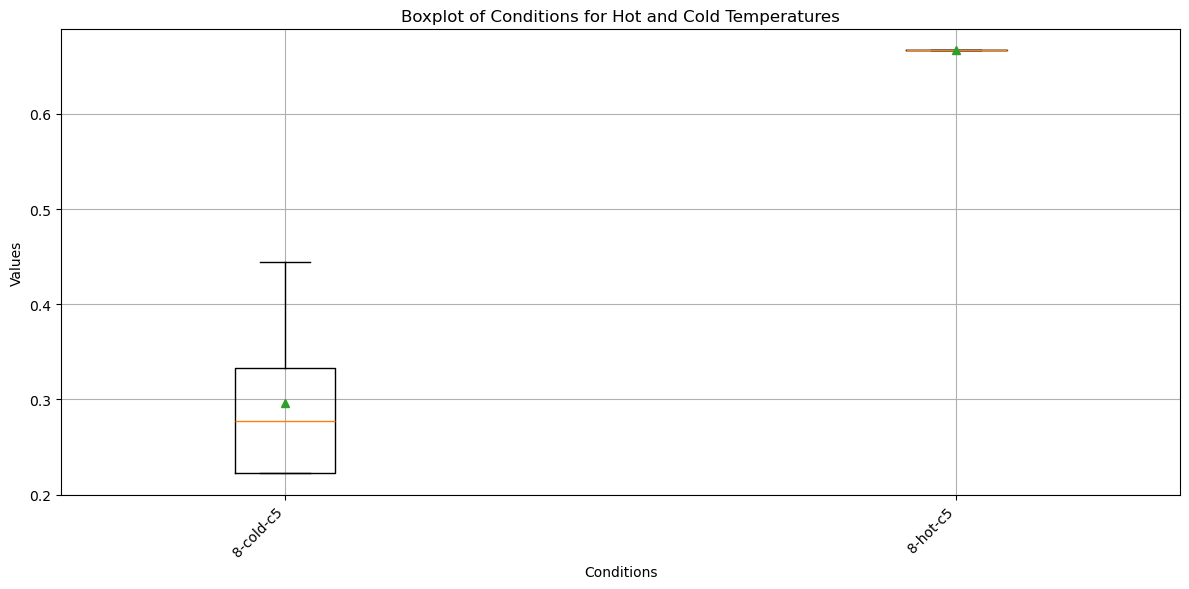

In [23]:
# Extracting data for plotting (random)
labels = []
all_data = []
positions = []
num_subgroups = sum(len(inner_dict) for outer_dict in result_random.values() for inner_dict in outer_dict.values())

i,j,k=0,0,0
for outer_key, outer_value in result_random.items():
    i+=1
    for inner_key, inner_value in outer_value.items():
        j+=1
        for innermost_key, innermost_value in inner_value.items():
            k+=1
            labels.append(f"{outer_key}-{inner_key}-{innermost_key}")
            all_data.append(innermost_value)
            positions.append(1.2*i+.9*j+.6*k)

# Creating boxplot with custom positions
num_boxes = len(all_data)
num_outer_keys = len(result_random)
group_gap = 3  # adjust the gap between groups


plt.figure(figsize=(12, 6))
plt.boxplot(all_data, positions=positions, showmeans=True)

plt.xticks(positions, labels, rotation=45, ha='right')
plt.xlabel('Conditions')
plt.ylabel('Values')
plt.title('Boxplot of Conditions for Hot and Cold Temperatures')
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

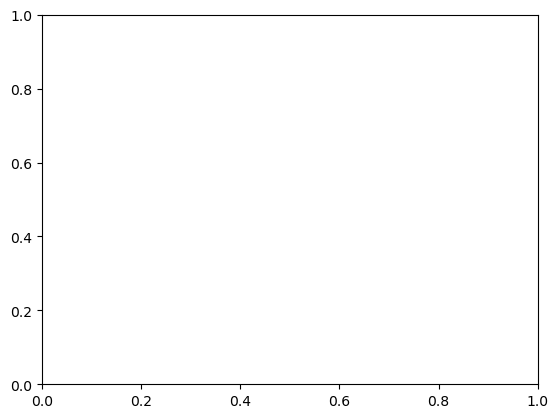

In [48]:

# Extracting data for box plot
hot_data = [result[key]['hot'] for key in result.keys()]
cold_data = [result[key]['cold'] for key in result.keys()]
labels = [f'{key} - Hot' for key in result.keys()] + [f'{key} - Cold' for key in result.keys()]



# Creating box plot
plt.boxplot(hot_data + cold_data, labels=labels)
plt.xlabel('Temperature')
plt.ylabel('Values')
plt.title('Box plot of Hot and Cold data')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [25]:
for sim_index in twoQdmsrandom:
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_info = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-7 else 0 for k, v in mutual_info.items()}
        #print(filtered_mutual_info)

In [26]:
for sim_index in twoQdmsgreedy:
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_info = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-7 else 0 for k, v in mutual_info.items()}
        #print(filtered_mutual_info)

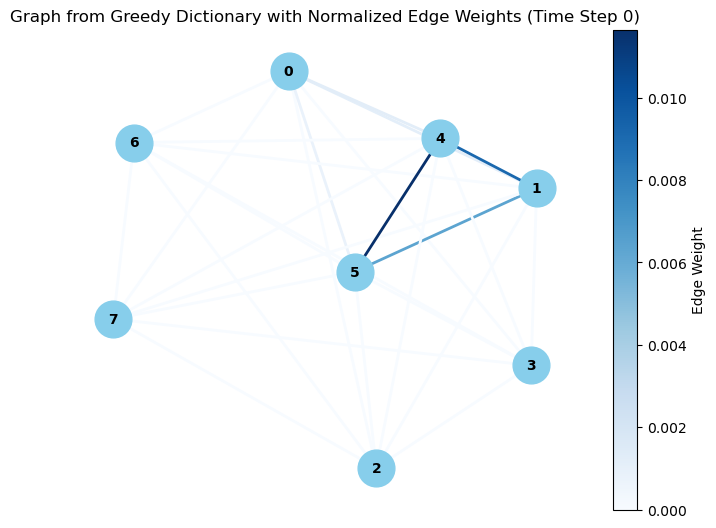

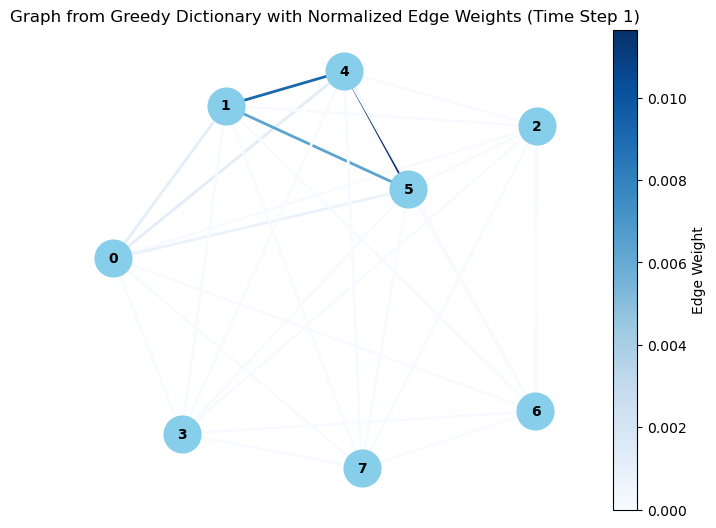

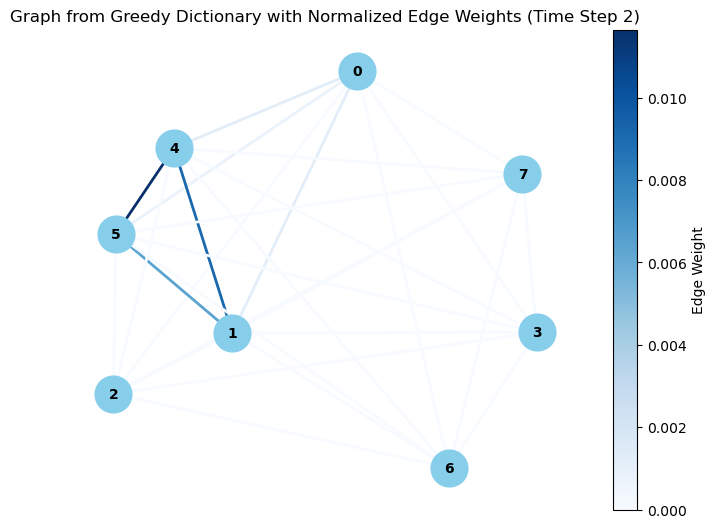

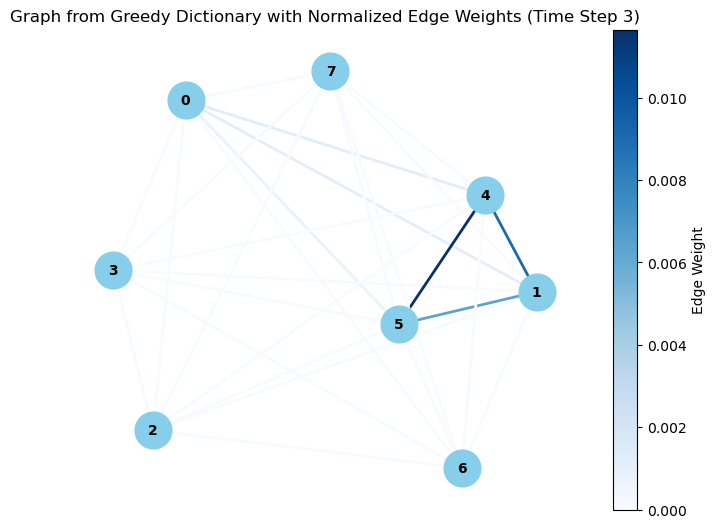

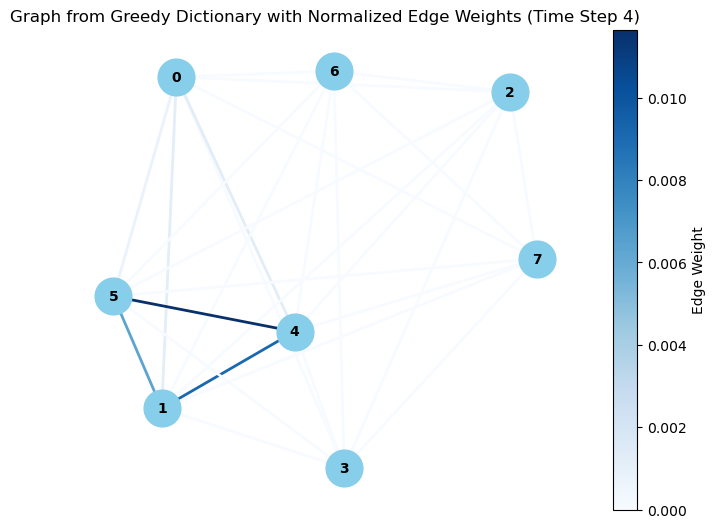

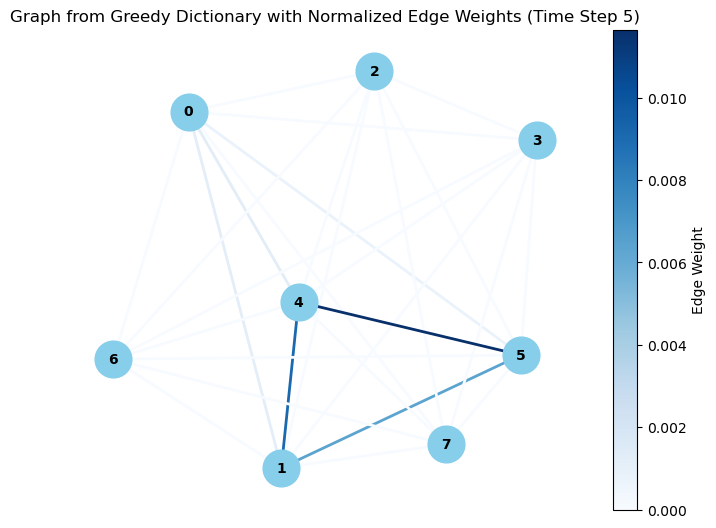

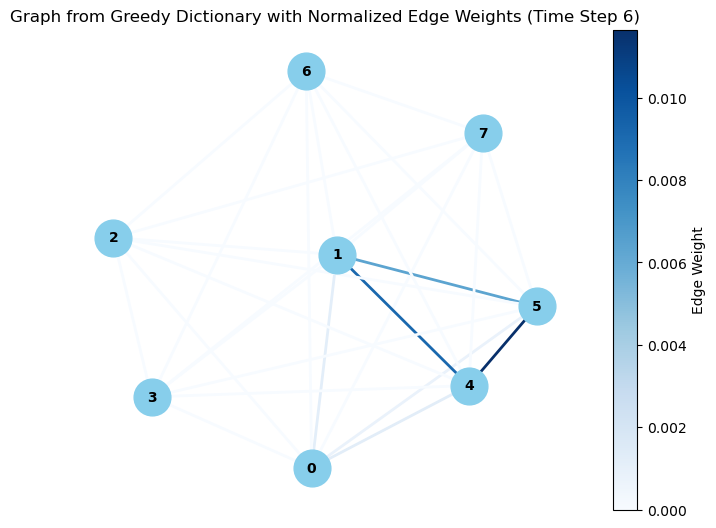

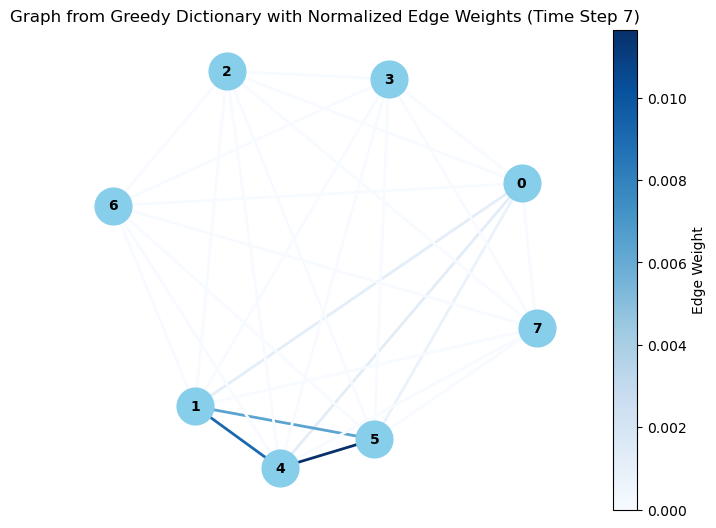

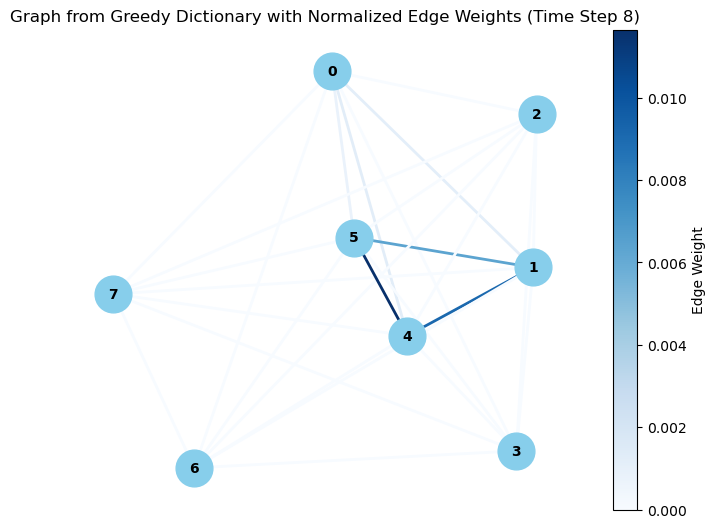

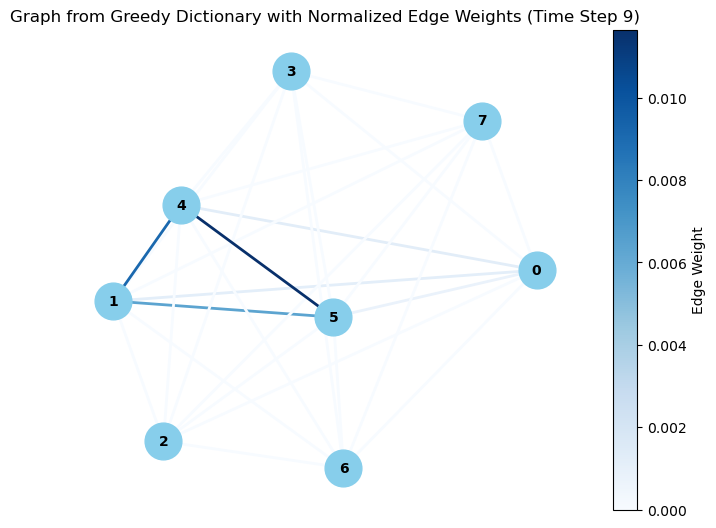

In [29]:
#Creates Normalization at each time index
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Loop through each sim_index
for sim_index in twoQdmsgreedy:
    # Create an empty list to store networks for this sim_index
    networks = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-7 else 0 for k, v in mutual_info.items()}
    
        # Create a graph object
        G = nx.Graph()
        
        # Add edges from the dictionary
        for edge, weight in filtered_mutual_info.items():
            G.add_edge(*edge, weight=weight)
        
        # Normalize edge weights
        edge_weights = [weight for _, _, weight in G.edges(data='weight')]
        norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
        
        # Create a colormap for edge colors
        cmap = plt.cm.Blues
        
        # Add edges with normalized weights and colored edges
        for u, v, data in G.edges(data=True):
            norm_weight = norm(data['weight'])
            G[u][v]['norm_weight'] = norm_weight
            G[u][v]['color'] = cmap(norm_weight)
        
        # Append the graph to the list of networks for this sim_index
        networks.append(G)
    
    # Now plot all networks for this sim_index
    for i, G in enumerate(networks):
        # Draw the graph
        pos = nx.spring_layout(G)  # Positions for all nodes
        nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold',
                edge_color=[data['color'] for _, _, data in G.edges(data=True)], width=2.0)
        
        # Create a ScalarMappable for colormap and normalize
        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca())  # Use current axis (gca)
        cbar.set_label('Edge Weight')
        
        plt.title(f"Graph from Greedy Dictionary with Normalized Edge Weights (Time Step {i})")
        plt.show()

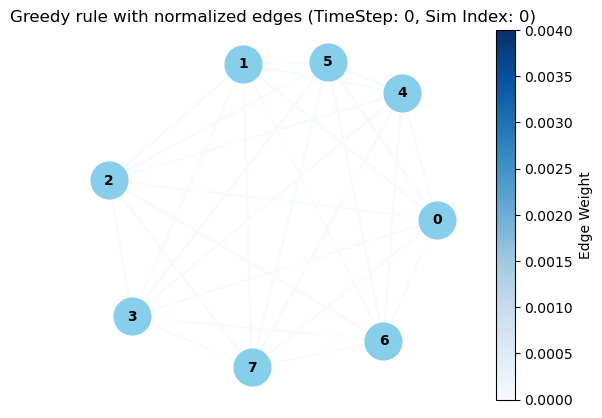

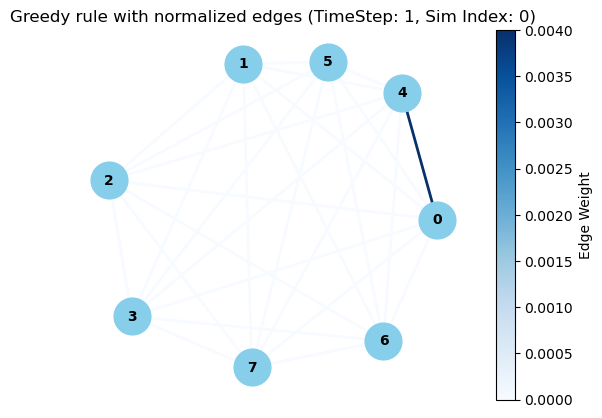

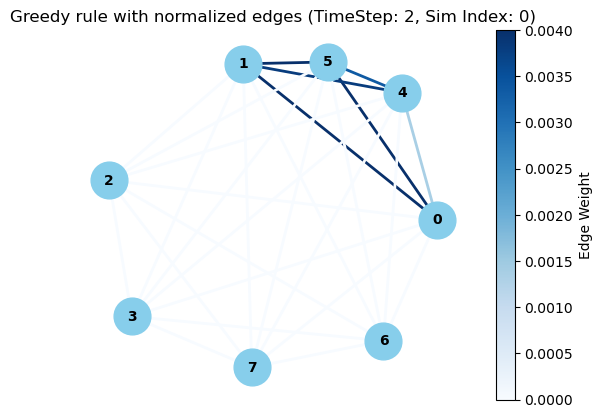

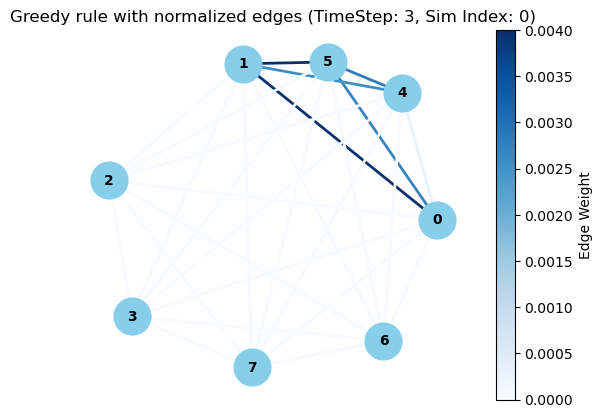

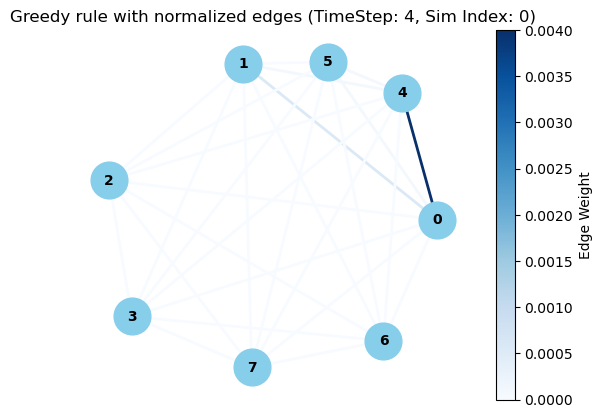

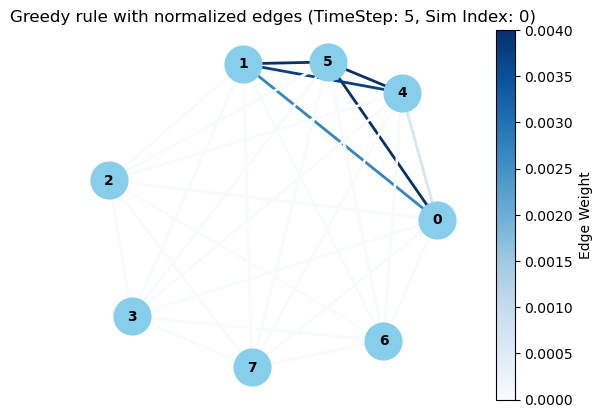

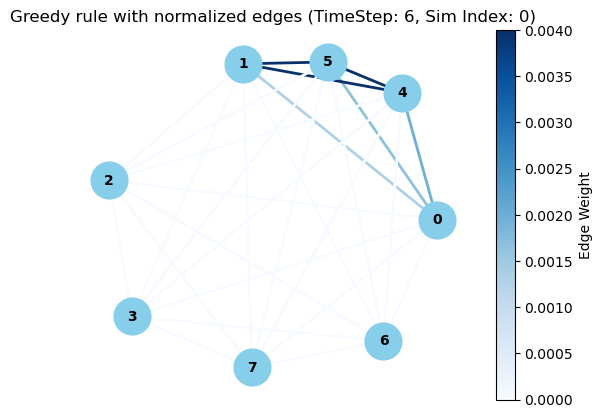

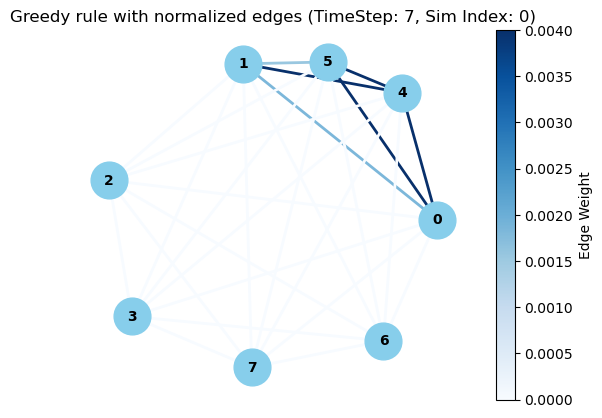

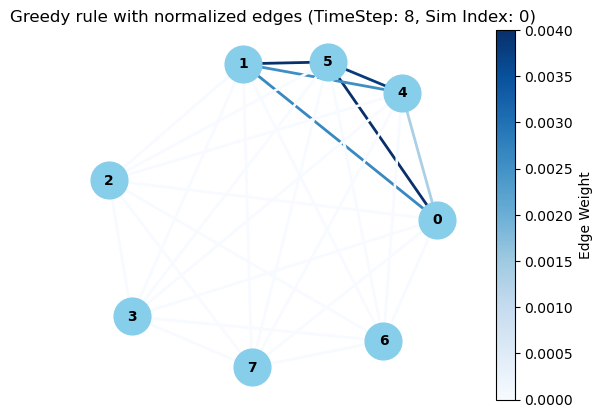

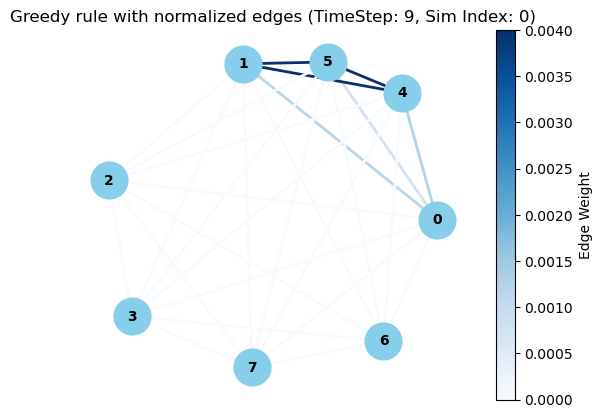

In [30]:
#Creates Normalization at each time index and normalizes at each time index between colorbar_min to colorbar_max
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import networkx as nx

# Set desired minimum and maximum values for color bar
colorbar_min = 0
colorbar_max = 0.004

# Calculate fixed node positions outside the loop
fixed_node_positions = nx.spring_layout(G)

# Loop through each sim_index
for sim_index_idx, sim_index in enumerate(twoQdmsgreedy):
    # Create an empty list to store networks for this sim_index
    networks = []
    
    # Loop through each time_step in the sim_index
    for time_step_idx, time_step in enumerate(sim_index):
        mutual_information = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-7 else 0 for k, v in mutual_information.items()}
    
        # Create a graph object
        G = nx.Graph()
        
        # Add edges from the dictionary
        for edge, weight in filtered_mutual_info.items():
            G.add_edge(*edge, weight=weight)
        
        # Normalize edge weights
        edge_weights = [weight for _, _, weight in G.edges(data='weight')]
        norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
        norm.vmin = colorbar_min  # Set the desired minimum value
        norm.vmax = colorbar_max  # Set the desired maximum value
        
        # Create a colormap for edge colors
        cmap = plt.cm.Blues
        
        # Add edges with normalized weights and colored edges
        for u, v, data in G.edges(data=True):
            norm_weight = norm(data['weight'])
            G[u][v]['norm_weight'] = norm_weight
            G[u][v]['color'] = cmap(norm_weight)
        
        # Append the graph to the list of networks for this sim_index
        networks.append((G, time_step_idx))
    
    # Now plot and save all networks for this sim_index
    for i, (G, time_step_idx) in enumerate(networks):
        # Create a new figure and axis
        fig, ax = plt.subplots()
        
        # Draw the graph with fixed node positions
        nx.draw(G, fixed_node_positions, with_labels=True, node_size=700, node_color='skyblue',
                font_size=10, font_weight='bold', edge_color=[data['color'] for _, _, data in G.edges(data=True)],
                width=2.0, ax=ax)
        
        # Create a ScalarMappable for colormap and normalize
        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)  # Use current axis (ax)
        cbar.set_label('Edge Weight')
        
        # Set the color bar limits
        sm.set_clim(colorbar_min, colorbar_max)
        
        plt.title(f"Greedy rule with normalized edges (TimeStep: {time_step_idx}, Sim Index: {sim_index_idx})")
        
        # Save the figure with filename indicating time_step and sim_index
        #filename = f"network_sim_{sim_index_idx}_time_{time_step_idx}_greedy_longtime.png"
        #plt.savefig(filename)
        plt.show()
        plt.close()

Maximum Edge Weight: 0.03842179997488926
Minimum Edge Weight: 0


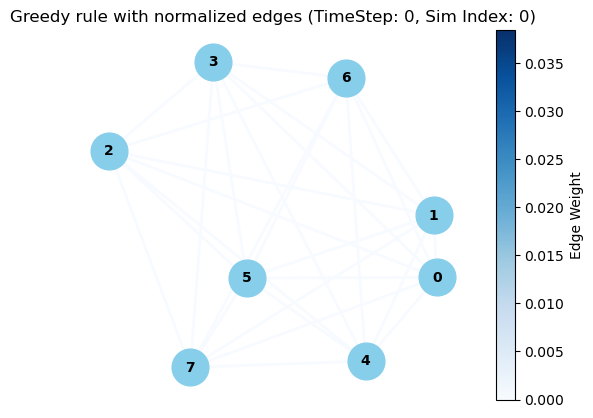

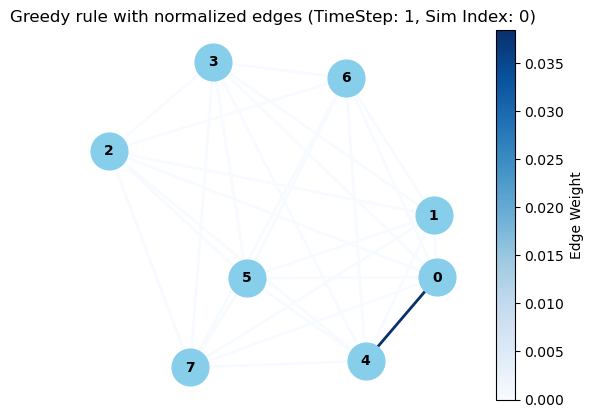

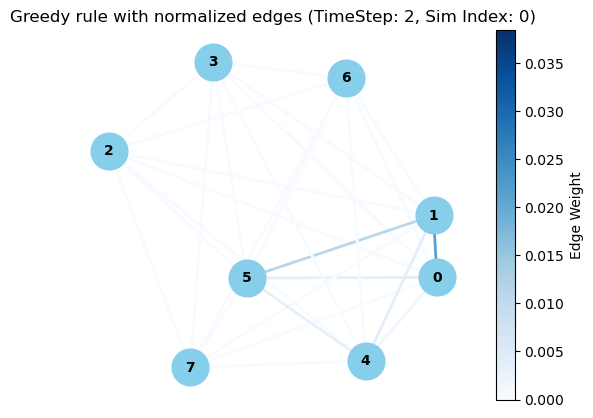

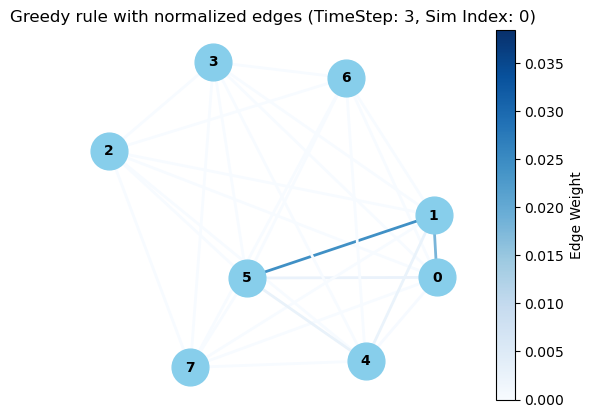

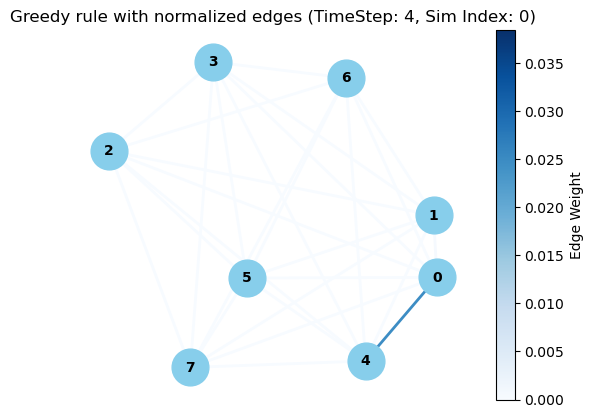

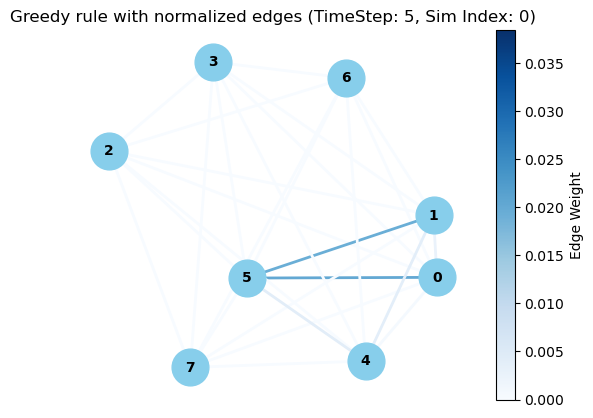

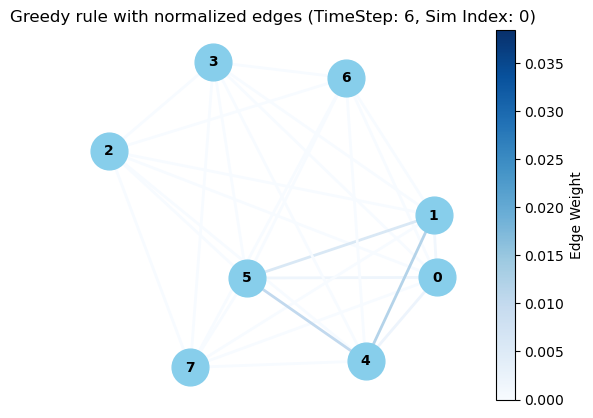

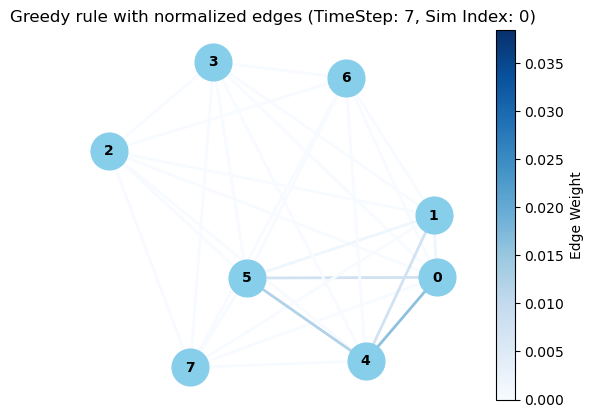

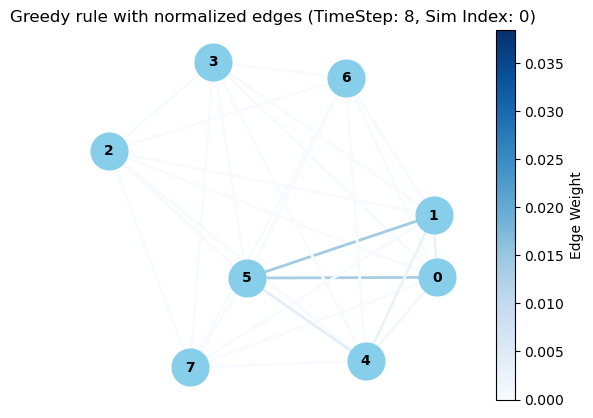

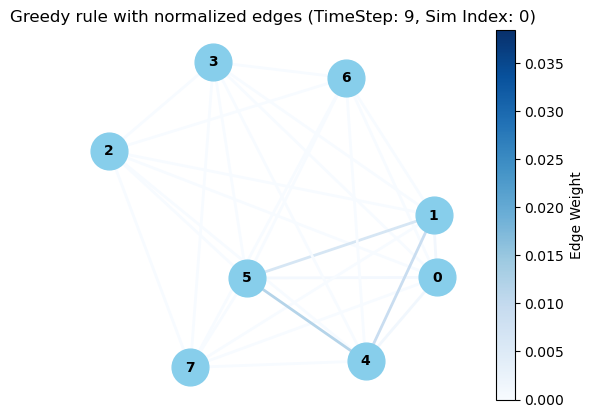

In [31]:
#Creates overall normalization by computing max and min weight from the entire simulation and then normalizes each time step according to this global normalization.
#prints max and min weight
# Create a graph object
#G = nx.Graph()
# Calculate fixed node positions outside the loop
fixed_node_positions = nx.spring_layout(G)

# Loop through each sim_index
all_edge_weights = []
for sim_index_idx, sim_index in enumerate(twoQdmsgreedy):
     # Create an empty list to store networks for this sim_index
    networks = []
    for time_step_idx, time_step in enumerate(sim_index):
        mutual_information = measure.mutual_information_of_every_pair_dict(time_step)
        filtered_mutual_info = {k: v if v >= 1e-7 else 0 for k, v in mutual_information.items()}
    
        G = nx.Graph()
        for edge, weight in filtered_mutual_info.items():
            G.add_edge(*edge, weight=weight)
            all_edge_weights.append(weight)
        
        networks.append((G, time_step_idx))
    
    # Calculate the overall maximum and minimum edge weights
    max_edge_weight = max(all_edge_weights)
    min_edge_weight = min(all_edge_weights)

    print("Maximum Edge Weight:", max_edge_weight)
    print("Minimum Edge Weight:", min_edge_weight)

    # Normalize edge weights to be between 0 and 1
    norm = Normalize(vmin=min_edge_weight, vmax=max_edge_weight)

    # Create a colormap for edge colors
    cmap = plt.cm.Blues

    # Loop through each sim_index
    for i, (G, time_step_idx) in enumerate(networks):
        fig, ax = plt.subplots()
    
        # Draw the graph with fixed node positions
        nx.draw(G, fixed_node_positions, with_labels=True, node_size=700, node_color='skyblue',
                font_size=10, font_weight='bold', edge_color=[cmap(norm(data['weight'])) for u, v, data in G.edges(data=True)],
                width=2.0, ax=ax)
        
        # Create a ScalarMappable for colormap and normalize
        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Edge Weight')
        
        plt.title(f"Greedy rule with normalized edges (TimeStep: {time_step_idx}, Sim Index: {sim_index_idx})")
        
        # Save the figure with filename indicating time_step and sim_index
        filename = f"network_sim_{sim_index_idx}_time_{time_step_idx}_greedy_longtime_max_min_global_norm.png"
        plt.savefig(filename)
        plt.show()
        plt.close()

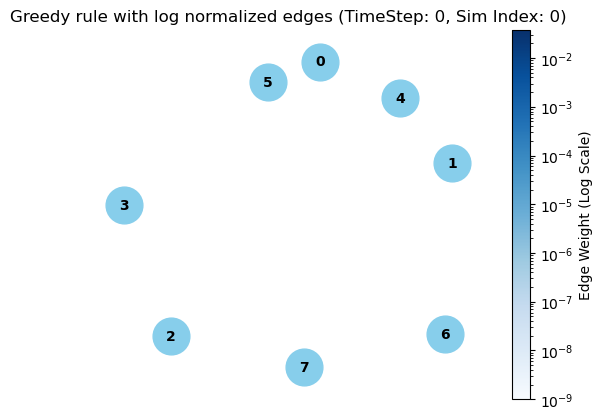

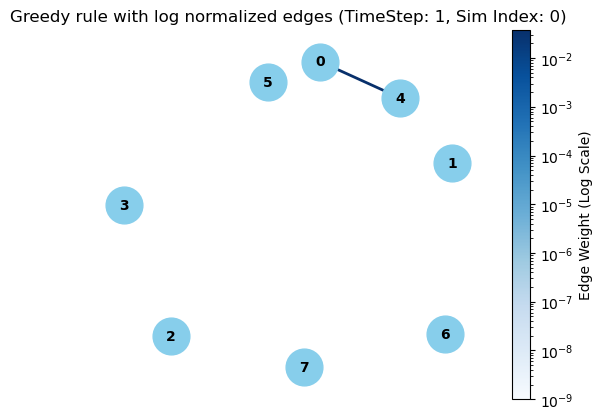

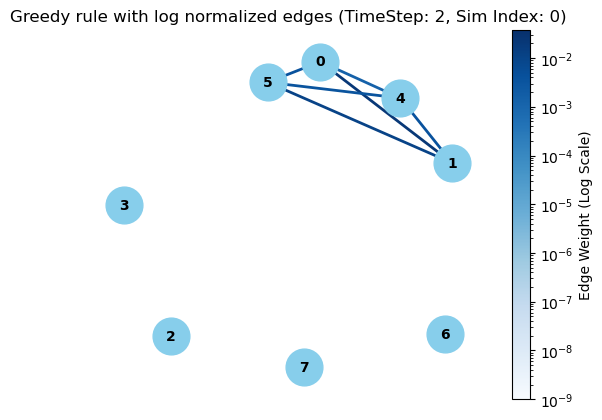

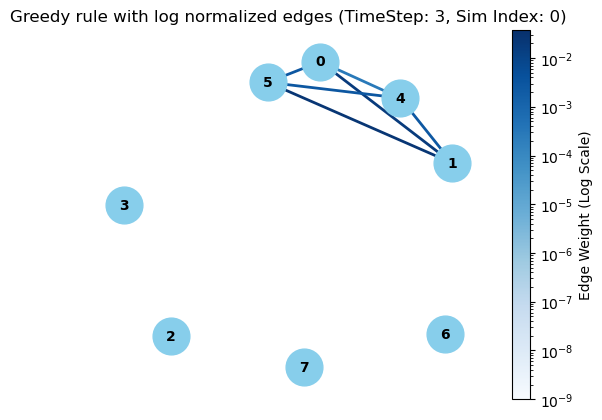

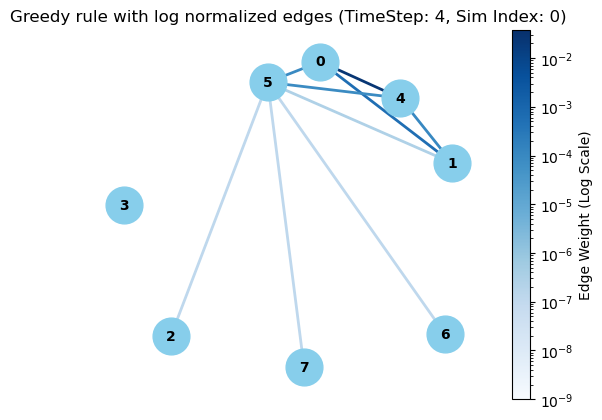

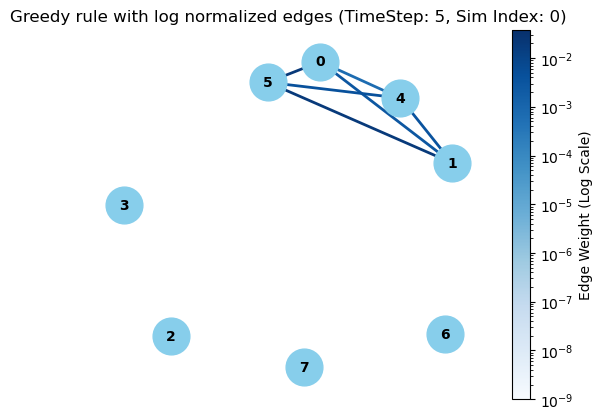

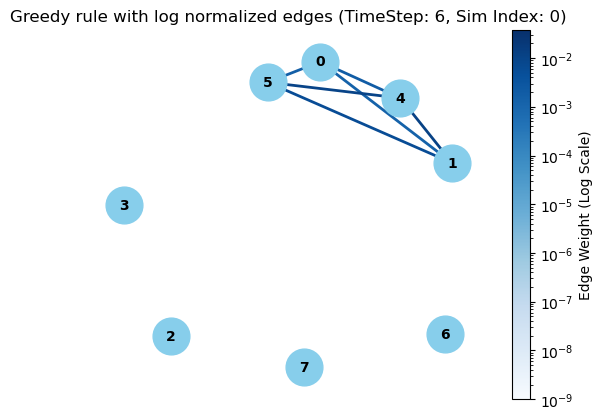

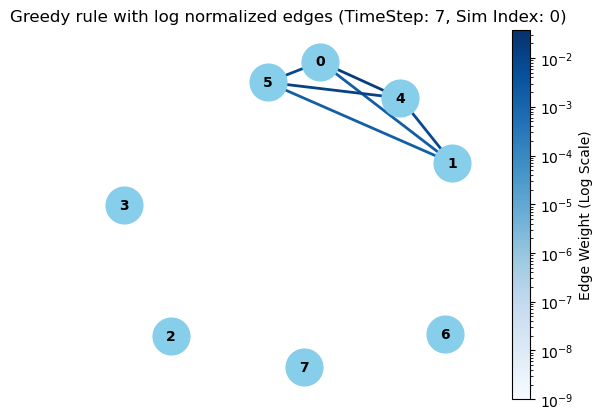

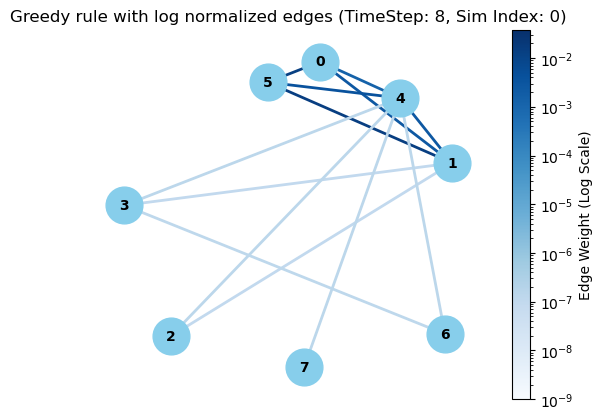

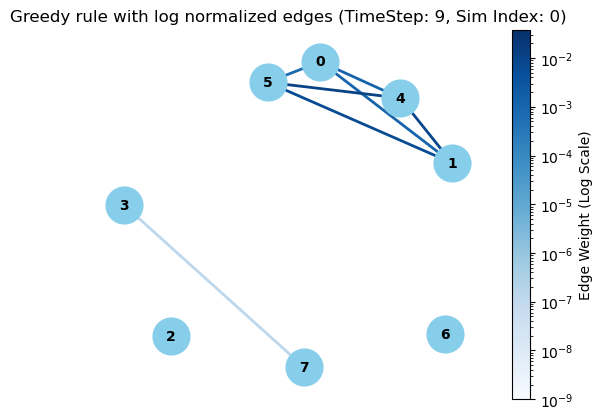

In [32]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
#G = nx.Graph()

# Assign node positions using spring layout
fixed_node_positions = nx.spring_layout(G, seed=42)

# Loop through each sim_index
all_edge_weights = []
for sim_index_idx, sim_index in enumerate(twoQdmsgreedy):
    # Create an empty list to store networks for this sim_index
    networks = []
    for time_step_idx, time_step in enumerate(sim_index):
        mutual_information = measure.mutual_information_of_every_pair_dict(time_step)
        filtered_mutual_info = {k: v if v >= 1e-7 else 0 for k, v in mutual_information.items()}
    
        G = nx.Graph()
        for edge, weight in filtered_mutual_info.items():
            G.add_edge(*edge, weight=weight)
            all_edge_weights.append(weight)
        
        networks.append((G, time_step_idx))
    
    # Calculate the overall maximum and minimum edge weights
    max_edge_weight = max(all_edge_weights)
    min_edge_weight = min(all_edge_weights)
    
    # Avoid having min_edge_weight as 0, add a small epsilon
    epsilon = 1e-9
    if min_edge_weight < epsilon:
        min_edge_weight = epsilon
    
    # Normalize edge weights to be between 0 and 1 using logarithmic scale
    norm = LogNorm(vmin=min_edge_weight, vmax=max_edge_weight)
    
    # Create a colormap for edge colors
    cmap = plt.cm.Blues
    
    # Loop through each sim_index
    for i, (G, time_step_idx) in enumerate(networks):
        fig, ax = plt.subplots()
        
        # Draw the graph with fixed node positions
        nx.draw(G, pos=fixed_node_positions, with_labels=True, node_size=700, node_color='skyblue',
                font_size=10, font_weight='bold', edge_color=[cmap(norm(data['weight'])) for u, v, data in G.edges(data=True)],
                width=2.0, ax=ax)
        
        # Create a ScalarMappable for colormap and normalize
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Edge Weight (Log Scale)')
        
        plt.title(f"Greedy rule with log normalized edges (TimeStep: {time_step_idx}, Sim Index: {sim_index_idx})")
        
        # Save the figure with filename indicating time_step and sim_index
        filename = f"network_sim_{sim_index_idx}_time_{time_step_idx}_greedy_longtime_log_global_norm.png"
        plt.savefig(filename)
        plt.show()
        plt.close()

Maximum Edge Weight: 0.03842179997488926
Minimum Edge Weight: 0


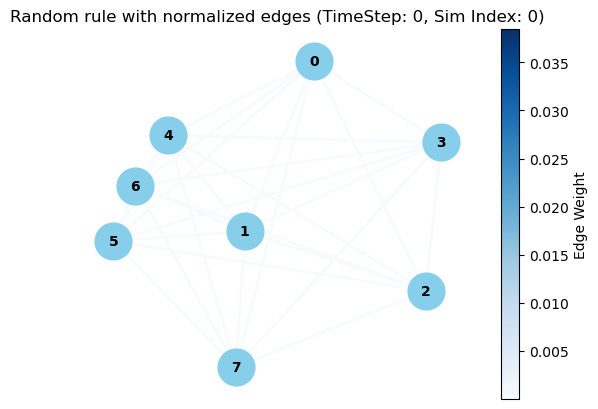

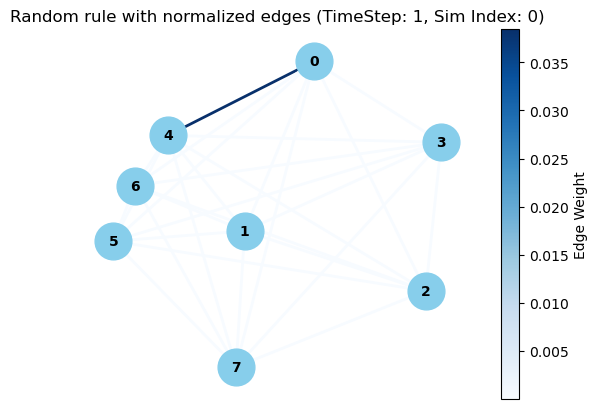

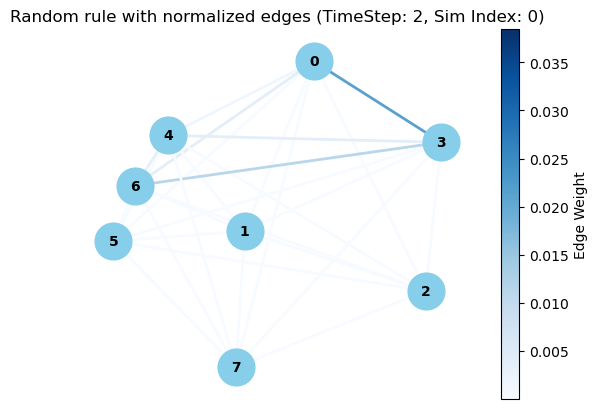

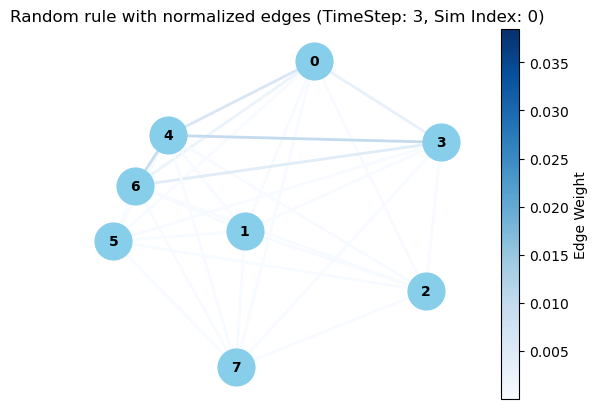

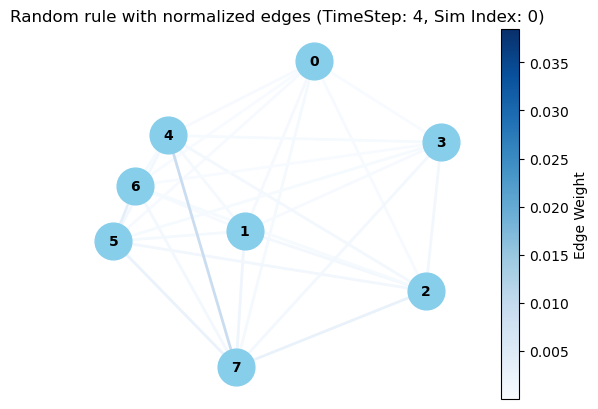

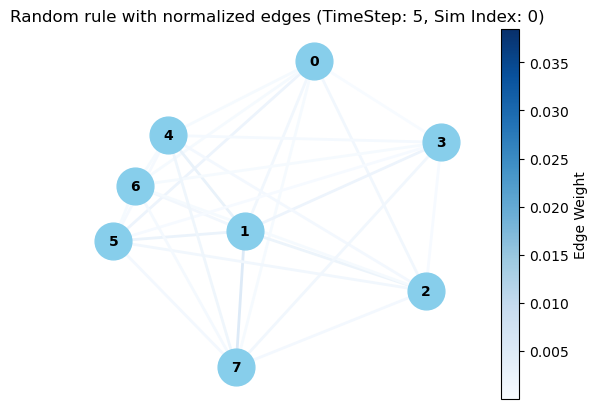

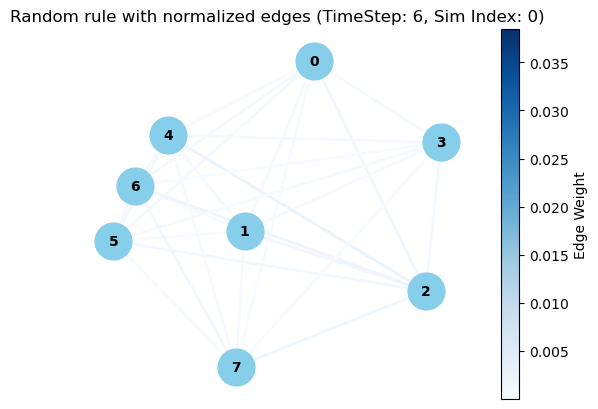

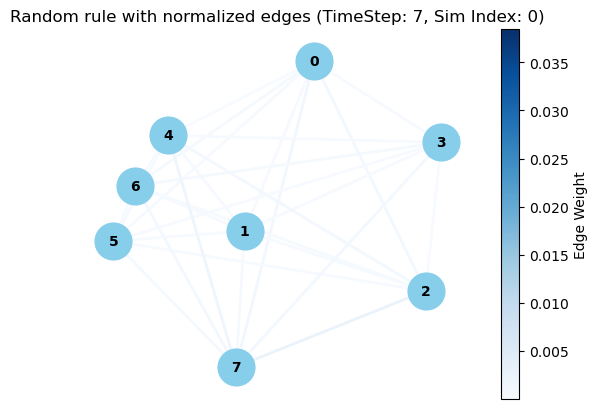

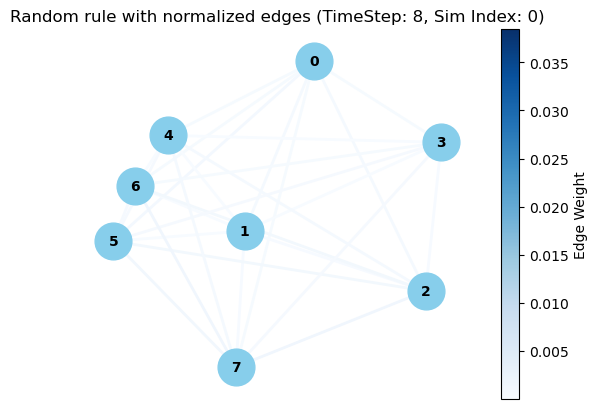

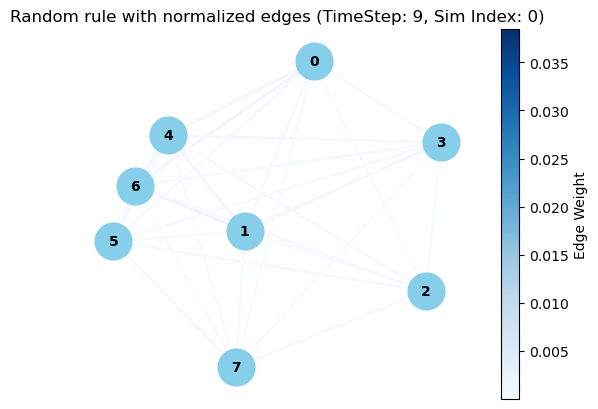

In [33]:
#Creates overall normalization by computing max and min weight from the etiner simulation and then normalizes each time step according to this global normalization.
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import networkx as nx
# Create a graph object
#G = nx.Graph()
# Calculate fixed node positions outside the loop
fixed_node_positions = nx.spring_layout(G)
# Loop through each sim_index
all_edge_weights_random = []
for sim_index_idx, sim_index in enumerate(twoQdmsrandom):
     # Create an empty list to store networks for this sim_index
    networks = []
    for time_step_idx, time_step in enumerate(sim_index):
        mutual_information_random = measure.mutual_information_of_every_pair_dict(time_step)
        filtered_mutual_info_random = {k: v if v >= 1e-7 else 0 for k, v in mutual_information_random.items()}
    
        G = nx.Graph()
        for edge, weight in filtered_mutual_info_random.items():
            G.add_edge(*edge, weight=weight)
            all_edge_weights_random.append(weight)
        
        networks.append((G, time_step_idx))
    
    # Calculate the overall maximum and minimum edge weights
    max_edge_weight_random = max(all_edge_weights_random)
    min_edge_weight_random = min(all_edge_weights_random)
    
    print("Maximum Edge Weight:", max_edge_weight_random)
    print("Minimum Edge Weight:", min_edge_weight_random)
    
    # Normalize edge weights to be between 0 and 1
    norm = Normalize(vmin=min_edge_weight, vmax=max_edge_weight)
    
    # Create a colormap for edge colors
    cmap = plt.cm.Blues
    
    # Loop through each sim_index
    for i, (G, time_step_idx) in enumerate(networks):
        fig, ax = plt.subplots()
        
        # Draw the graph with fixed node positions
        nx.draw(G, fixed_node_positions, with_labels=True, node_size=700, node_color='skyblue',
                font_size=10, font_weight='bold', edge_color=[cmap(norm(data['weight'])) for u, v, data in G.edges(data=True)],
                width=2.0, ax=ax)
        
        # Create a ScalarMappable for colormap and normalize
        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Edge Weight')
        
        plt.title(f"Random rule with normalized edges (TimeStep: {time_step_idx}, Sim Index: {sim_index_idx})")
        
        # Save the figure with filename indicating time_step and sim_index
        filename = f"network_sim_{sim_index_idx}_time_{time_step_idx}_random_longtime_max_min_global_norm.png"
        plt.savefig(filename)
        plt.show()
        plt.close()

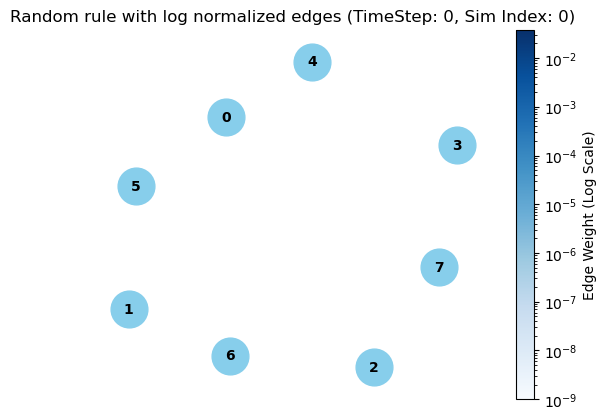

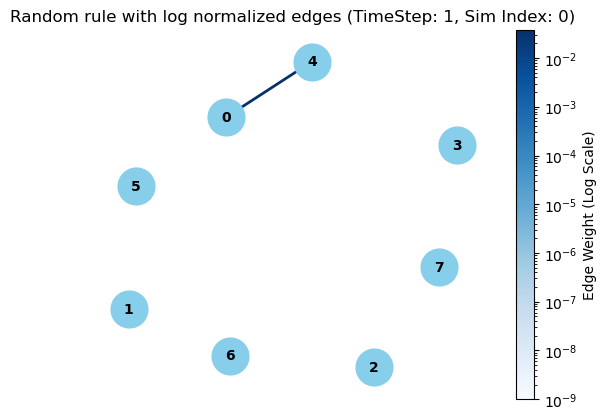

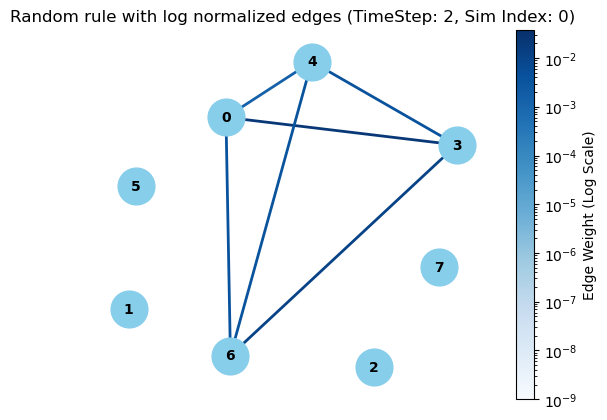

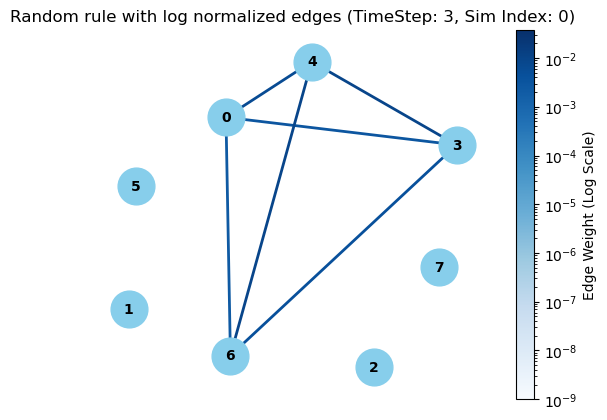

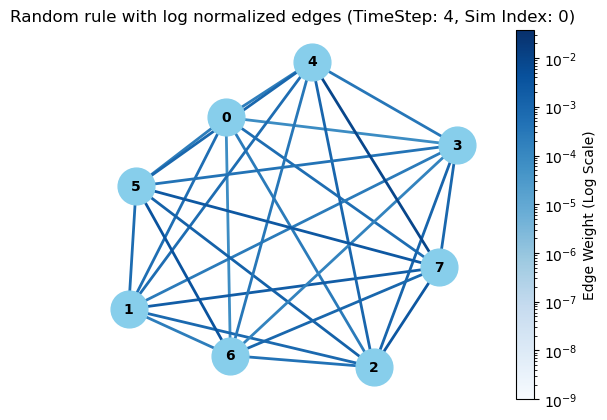

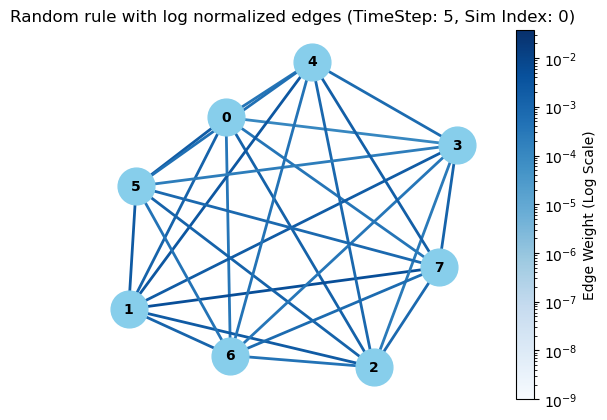

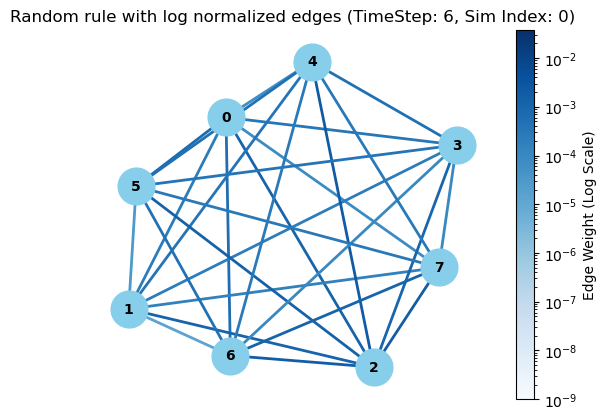

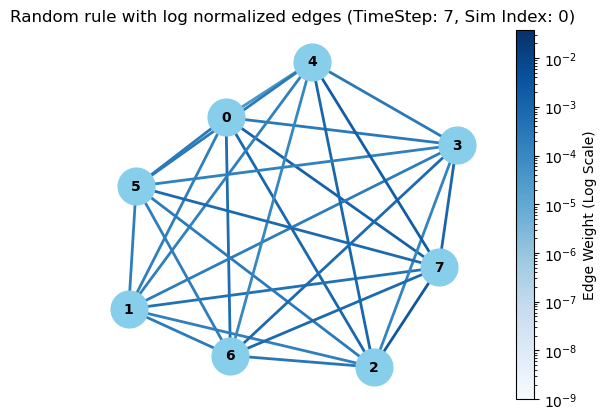

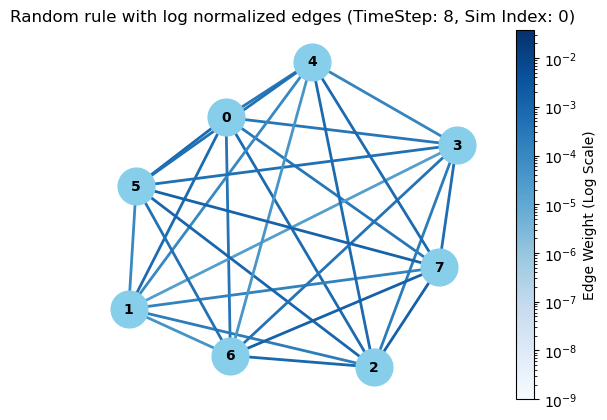

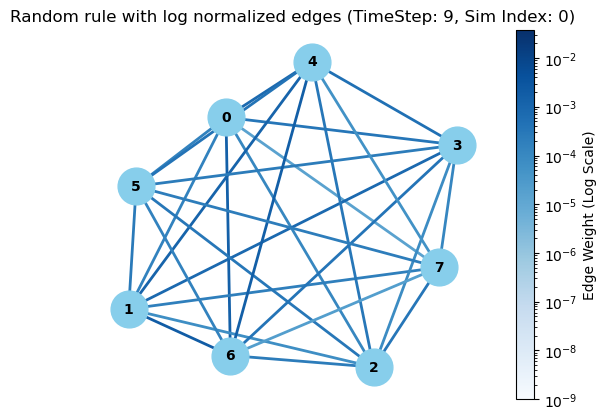

In [34]:
#creates overall normalization from computing the max and min weight from the entire simulation and then logarithmic normalizes each time step
#Log norm helps recognize small differences as bid differences in color
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import networkx as nx
# Create a graph object
#G = nx.Graph()
# Calculate fixed node positions outside the loop
fixed_node_positions = nx.spring_layout(G)
# Loop through each sim_index
all_edge_weights_random = []
for sim_index_idx, sim_index in enumerate(twoQdmsrandom):
     # Create an empty list to store networks for this sim_index
    networks = []
    for time_step_idx, time_step in enumerate(sim_index):
        mutual_information = measure.mutual_information_of_every_pair_dict(time_step)
        filtered_mutual_info = {k: v if v >= 1e-7 else 0 for k, v in mutual_information.items()}
    
        G = nx.Graph()
        for edge, weight in filtered_mutual_info.items():
            G.add_edge(*edge, weight=weight)
            all_edge_weights.append(weight)
        
        networks.append((G, time_step_idx))
    
    # Calculate the overall maximum and minimum edge weights
    max_edge_weight = max(all_edge_weights)
    min_edge_weight = min(all_edge_weights)
    
    # Avoid having min_edge_weight as 0, add a small epsilon
    epsilon = 1e-9
    if min_edge_weight < epsilon:
        min_edge_weight = epsilon
    
    # Normalize edge weights to be between 0 and 1 using logarithmic scale
    norm = LogNorm(vmin=min_edge_weight, vmax=max_edge_weight)
    
    # Create a colormap for edge colors
    cmap = plt.cm.Blues
    
    # Loop through each sim_index
    for i, (G, time_step_idx) in enumerate(networks):
        fig, ax = plt.subplots()
        
        # Draw the graph with fixed node positions
        nx.draw(G, fixed_node_positions, with_labels=True, node_size=700, node_color='skyblue',
                font_size=10, font_weight='bold', edge_color=[cmap(norm(data['weight'])) for u, v, data in G.edges(data=True)],
                width=2.0, ax=ax)
        
        # Create a ScalarMappable for colormap and normalize
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Edge Weight (Log Scale)')
        
        plt.title(f"Random rule with log normalized edges (TimeStep: {time_step_idx}, Sim Index: {sim_index_idx})")
        
        # Save the figure with filename indicating time_step and sim_index
        filename = f"network_sim_{sim_index_idx}_time_{time_step_idx}_random_longtime_log_norm.png"
        plt.savefig(filename)
        plt.show()
        plt.close()

In [35]:
for sim_index in twoQdmsgreedy:
    # Create an empty list to store networks for this sim_index
    networks = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information_random = measure.mutual_information_of_every_pair_dict(time_step)
        # declaring an empty list
        listr = []
        # appending all the values in the list
        for value in mutual_information_random.values():
            listr.append(value)
        # calculating standard deviation using np.std
        std = np.std(listr)*10000
        meann=np.mean(listr)*10000    
        # printing results
        #print(max(listr)*10000,"mean:",meann , "std:",std)
    

In [36]:
for sim_index in twoQdmsrandom:
    # Create an empty list to store networks for this sim_index
    networks = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information = measure.mutual_information_of_every_pair_dict(time_step)
        # declaring an empty list
        listr = []
        # appending all the values in the list
        for value in mutual_information.values():
            listr.append(value)
        # calculating standard deviation using np.std
        std = np.std(listr)*10000
        meann=np.mean(listr)*10000    
         #printing results
        #print(max(listr)*10000,"mean:",meann , "std:",std)

In [87]:
initial_pops = [.2, .2, .2, .2, .4, .2, .2, .2]
initial_pops_thermal = [.225, .225, .225, .225, .225, .225, .225, .225]
system = DM.n_thermal_qbits(initial_pops)
system_thermal = DM.n_thermal_qbits(initial_pops_thermal)
(measure.entropy(system_thermal)-measure.entropy(system))*(1/8)

0.01116170375350134

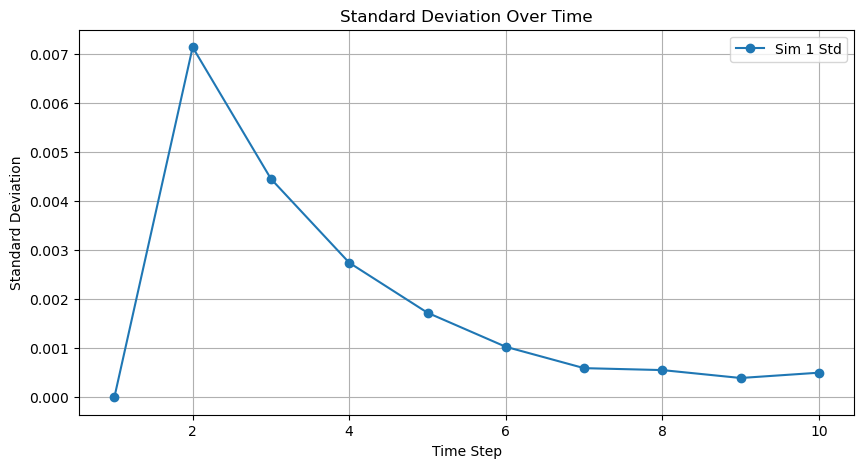

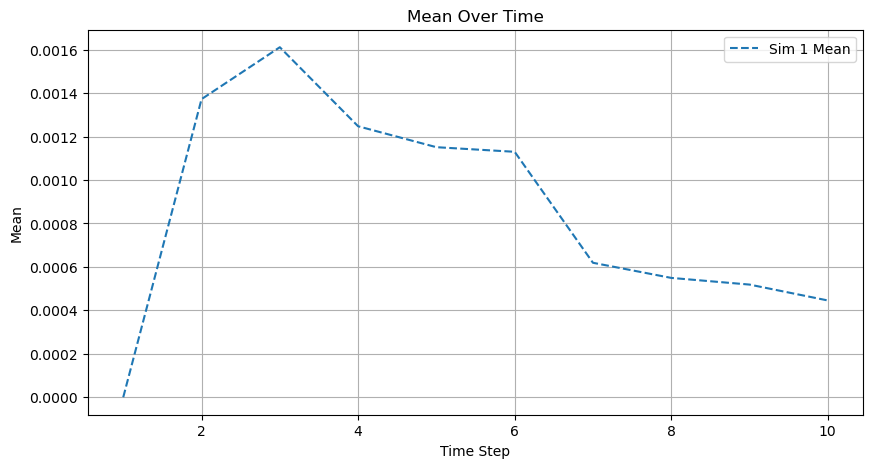

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty 2D array to store mean and std
mean_std_array = []

# Loop through each sim_index
for sim_index in twoQdmsrandom:
    # Create an empty list to store mean and std for this sim_index
    sim_mean_std = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information_random = measure.mutual_information_of_every_pair_dict(time_step)
        # declaring an empty list
        listr = []
        # appending all the values in the list
        for value in mutual_information_random.values():
            listr.append(value)
        # calculating standard deviation using np.std
        stds = np.std(listr)
        means = np.mean(listr)
        
        # Append mean and std to the list for this time step
        sim_mean_std.append([means, stds])
    
    # Append the list for this sim_index to the 2D array
    mean_std_array.append(sim_mean_std)

# Convert the list of lists to a numpy array
mean_std_array = np.array(mean_std_array)

# Extract standard deviation and mean values for each simulation
stds_random = mean_std_array[:, :, 1]
means_random = mean_std_array[:, :, 0]

# Create x-axis values (time steps)
time_steps = np.arange(1, stds_random.shape[1]+1 )

# Plot standard deviation for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(stds_random)):
    plt.plot(time_steps, stds_random[sim_idx], '-o', label=f'Sim {sim_idx + 1} Std')

plt.xlabel('Time Step')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation Over Time')
plt.legend()
filename = f"SD_MI_different_random_all_sim_index.png"
plt.savefig(filename)
plt.grid(True)
plt.show()

# Plot mean for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(means_random)):
    plt.plot(time_steps, means_random[sim_idx], '--', label=f'Sim {sim_idx + 1} Mean')

plt.xlabel('Time Step')
plt.ylabel('Mean')
plt.title('Mean Over Time')
plt.legend()
filename = f"Mean_MI_different_random_all_sim_index.png"
plt.savefig(filename)
plt.grid(True)
plt.show()


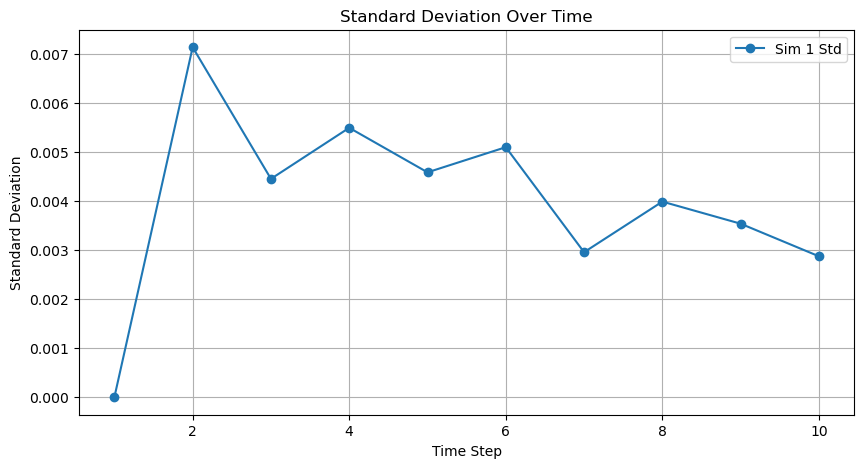

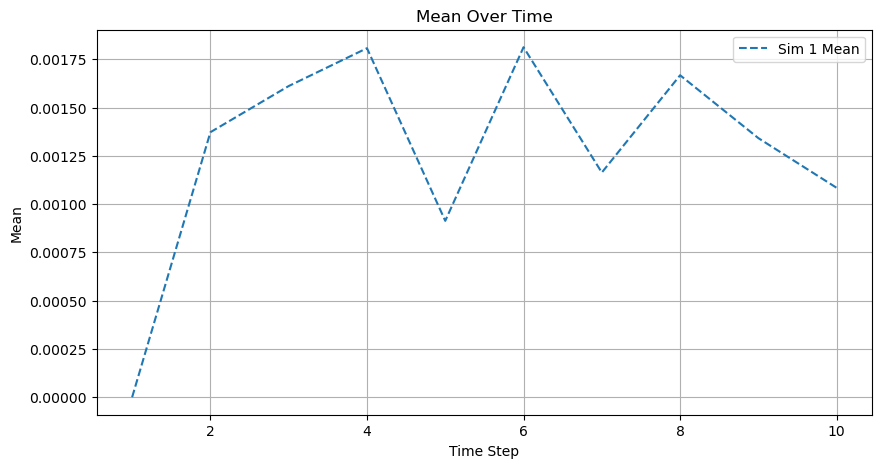

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty 2D array to store mean and std
mean_std_array = []

# Loop through each sim_index
for sim_index in twoQdmsgreedy:
    # Create an empty list to store mean and std for this sim_index
    sim_mean_std = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information = measure.mutual_information_of_every_pair_dict(time_step)
        # declaring an empty list
        listr = []
        # appending all the values in the list
        for value in mutual_information.values():
            listr.append(value)
        # calculating standard deviation using np.std
        stds = np.std(listr)
        means = np.mean(listr)
        
        # Append mean and std to the list for this time step
        sim_mean_std.append([means, stds])
    
    # Append the list for this sim_index to the 2D array
    mean_std_array.append(sim_mean_std)

# Convert the list of lists to a numpy array
mean_std_array = np.array(mean_std_array)

# Extract standard deviation and mean values for each simulation
stds_greedy = mean_std_array[:, :, 1]
means_greedy = mean_std_array[:, :, 0]

# Create x-axis values (time steps)
time_steps = np.arange(1, stds_greedy.shape[1] + 1)

# Plot standard deviation for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(stds_greedy)):
    plt.plot(time_steps, stds_greedy[sim_idx], '-o', label=f'Sim {sim_idx + 1} Std')

plt.xlabel('Time Step')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation Over Time')
plt.legend()
filename = f"SD_MI_different_greedy_all_sim_index.png"
plt.savefig(filename)
plt.grid(True)
plt.show()

# Plot mean for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(means_greedy)):
    plt.plot(time_steps, means_greedy[sim_idx], '--', label=f'Sim {sim_idx + 1} Mean')

plt.xlabel('Time Step')
plt.ylabel('Mean')
plt.title('Mean Over Time')
plt.legend()
filename = f"Mean_MI_different_greedy_all_sim_index.png"
plt.savefig(filename)
plt.grid(True)
plt.show()

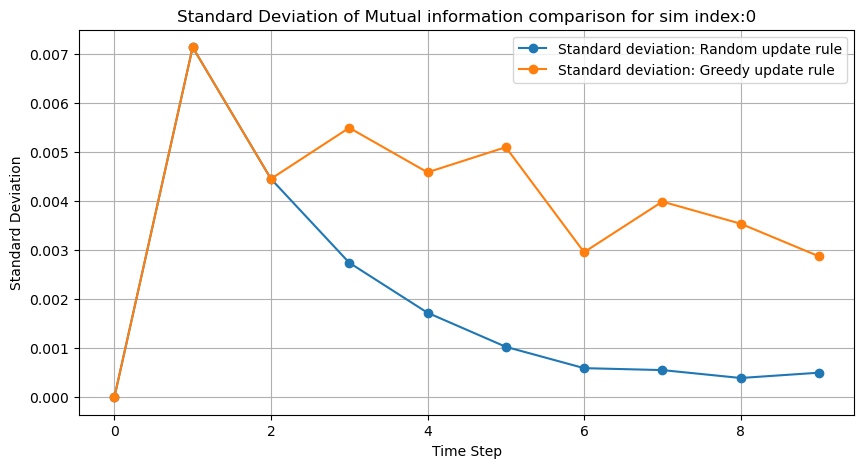

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for stds1 and stds2 (replace these with your actual data)
for sim_index in range(1):
    time_steps = np.arange(0, 10)
    stds1 =stds_random[sim_index]
    stds2 = stds_greedy[sim_index]
    
    # Plot stds1 and stds2 on the same plot
    plt.figure(figsize=(10, 5))
    plt.plot(time_steps, stds1, '-o', label='Standard deviation: Random update rule')
    plt.plot(time_steps, stds2, '-o', label='Standard deviation: Greedy update rule')
    plt.xlabel('Time Step')
    plt.ylabel('Standard Deviation' )
    plt.title(f"Standard Deviation of Mutual information comparison for sim index:{sim_index}")
    plt.legend()
    plt.grid(True)
    filename = f"SD_different_update_rules_sim_index_{sim_index}.png"
    plt.savefig(filename)
    plt.show()



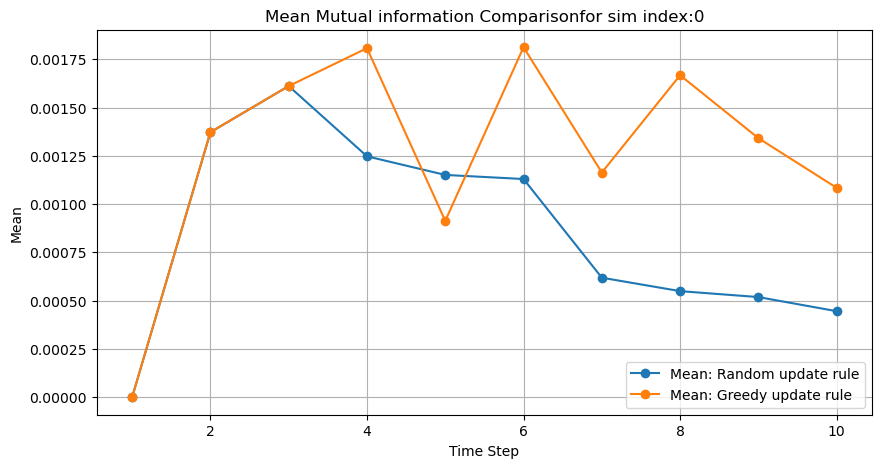

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for stds1 and stds2 (replace these with your actual data)
for sim_index in range(1):
    time_steps = np.arange(1, 11)
    means1 = means_random[sim_index]
    means2 = means_greedy[sim_index] 
    
    # Plot stds1 and stds2 on the same plot
    plt.figure(figsize=(10, 5))
    plt.plot(time_steps, means1, '-o', label='Mean: Random update rule')
    plt.plot(time_steps, means2, '-o', label='Mean: Greedy update rule')
    plt.xlabel('Time Step')
    plt.ylabel('Mean')
    plt.title(f"Mean Mutual information Comparisonfor sim index:{sim_index}")
    plt.legend()
    plt.grid(True)
    filename = f"MI_different_update_rules_sim_index_{sim_index}.png"
    plt.savefig(filename)
    plt.show()

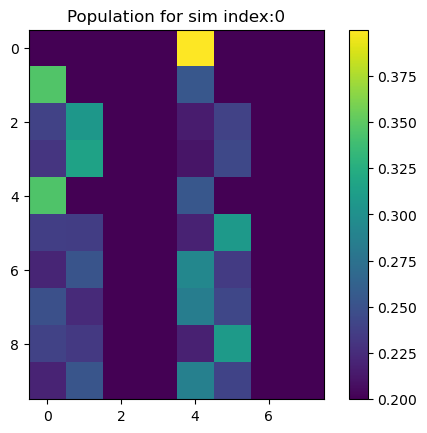

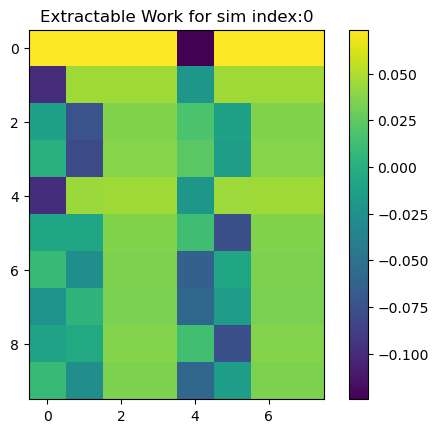

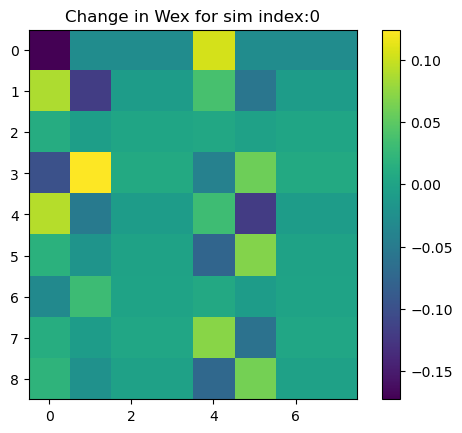

In [45]:
sim_index=0
extractable_work_ind_6 = np.array([measure.extractable_work_of_each_qubit_from_pops(time_slice) for time_slice in popsgreedy[sim_index]])
change_in_ex_work_ind_6 = np.diff(extractable_work_ind_6,axis = 0)
net_change = change_in_ex_work_ind_6.flatten()
plt.imshow(popsgreedy[sim_index], interpolation='none')
plt.title(f"Population for sim index:{sim_index}")
plt.colorbar()
filename = f"Population_greedy_{sim_index}.png"
plt.savefig(filename)
plt.show()
plt.close()
plt.imshow(extractable_work_ind_6, interpolation='none')
plt.title(f"Extractable Work for sim index:{sim_index}")
plt.colorbar()
filename = f"Wex_greedy_{sim_index}.png"
plt.savefig(filename)
plt.show()
plt.close()
plt.imshow(change_in_ex_work_ind_6, interpolation='none')
plt.title(f"Change in Wex for sim index:{sim_index}")
plt.colorbar()
filename = f"Delta_Wex_greedy_{sim_index}.png"
plt.savefig(filename)
plt.show()
plt.close()

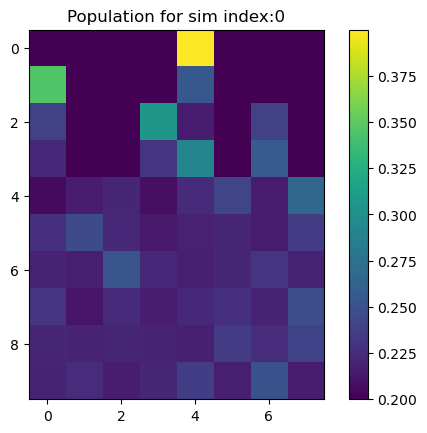

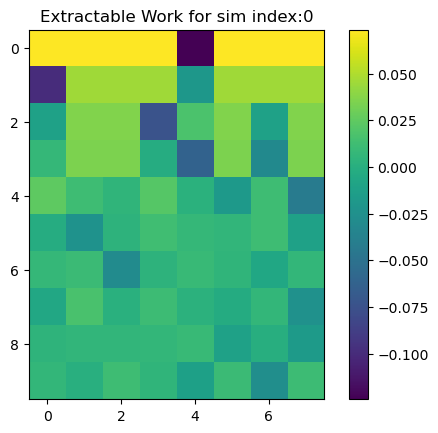

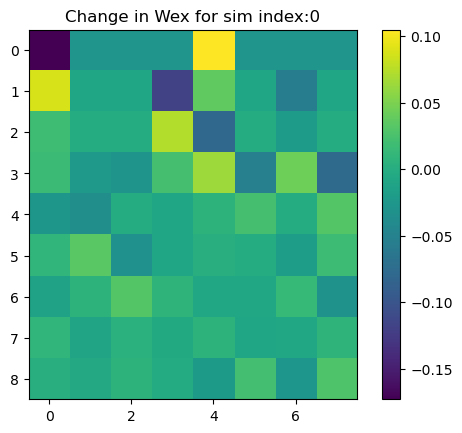

In [46]:
sim_index=0
extractable_work_ind_6 = np.array([measure.extractable_work_of_each_qubit_from_pops(time_slice) for time_slice in popsrandom[sim_index]])
change_in_ex_work_ind_6 = np.diff(extractable_work_ind_6,axis = 0)
plt.imshow(popsrandom[sim_index], interpolation='none')
plt.title(f"Population for sim index:{sim_index}")
plt.colorbar()
filename = f"Population_random_{sim_index}.png"
plt.savefig(filename)
plt.show()
plt.close()
plt.imshow(extractable_work_ind_6, interpolation='none')
plt.title(f"Extractable Work for sim index:{sim_index}")
plt.colorbar()
filename = f"Wex_random_{sim_index}.png"
plt.savefig(filename)
plt.show()
plt.close()
plt.imshow(change_in_ex_work_ind_6, interpolation='none')
plt.title(f"Change in Wex for sim index:{sim_index}")
plt.colorbar()
filename = f"Delta_Wex_random_{sim_index}.png"
plt.savefig(filename)
plt.show()
plt.close()

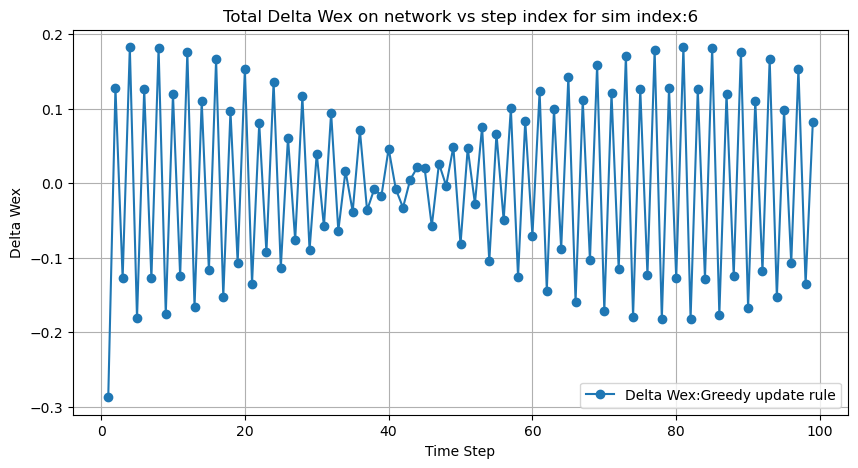

In [156]:
sim_index=6
extractable_work_ind_6 = np.array([measure.extractable_work_of_each_qubit_from_pops(time_slice) for time_slice in popsgreedy[sim_index]])
change_in_ex_work_ind_6 = np.diff(extractable_work_ind_6,axis = 0)
net_change = np.sum(change_in_ex_work_ind_6,axis=1)
time_steps = np.arange(1, 100)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, net_change, '-o', label='Delta Wex:Greedy update rule')
plt.xlabel('Time Step')
plt.ylabel('Delta Wex')
plt.title(f"Total Delta Wex on network vs step index for sim index:{sim_index}")
plt.legend()
plt.grid(True)
filename = f"total_Delta_Wex_greedy_{sim_index}.png"
plt.savefig(filename)
plt.show()

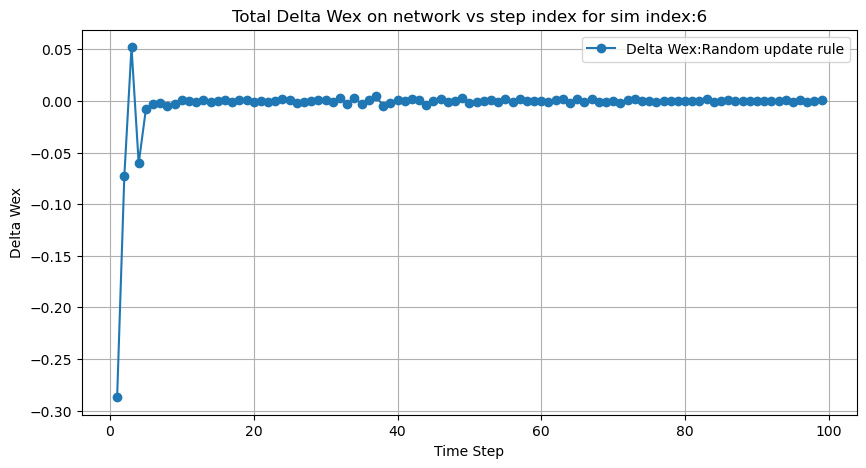

In [159]:
sim_index=6
extractable_work_ind_6 = np.array([measure.extractable_work_of_each_qubit_from_pops(time_slice) for time_slice in popsrandom[sim_index]])
change_in_ex_work_ind_6 = np.diff(extractable_work_ind_6,axis = 0)
net_change = np.sum(change_in_ex_work_ind_6,axis=1)
time_steps = np.arange(1, 100)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, net_change, '-o', label='Delta Wex:Random update rule')
plt.xlabel('Time Step')
plt.ylabel('Delta Wex')
plt.title(f"Total Delta Wex on network vs step index for sim index:{sim_index}")
plt.legend()
plt.grid(True)
filename = f"total_Delta_Wex_random_{sim_index}.png"
plt.savefig(filename)
plt.show()
